In [2]:
import os
os.chdir('..')

In [5]:
import pandas as pd
d = pd.read_csv('FeatureExtraction/feature_matrix.csv',header=0,sep=',')
del d['Unnamed: 0']
d = d.dropna()
d.head()

,ID,Color,Amplitude
0,1000359,z,2.6660
1,1000735,z,3.6635
2,1000743,z,1.4185
3,1000837,z,0.5860
4,100089,z,2.5655


In [2]:
one_hot = pd.get_dummies(d.ix[:,1])
d=d.drop('Color',axis=1)
d = d.join(one_hot)
d.head()

,ID,Amplitude,g,i,r,u,z
0,1000359,2.6660,0.0,0.0,0.0,0.0,1.0
1,1000735,3.6635,0.0,0.0,0.0,0.0,1.0
2,1000743,1.4185,0.0,0.0,0.0,0.0,1.0
3,1000837,0.5860,0.0,0.0,0.0,0.0,1.0
4,100089,2.5655,0.0,0.0,0.0,0.0,1.0


In [3]:
from sklearn.cluster import KMeans
import numpy as np
X = d.ix[:10000,1:7]
Y = X.values
Y

array([[ 2.666 ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 3.6635,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 1.4185,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       ..., 
       [ 0.8445,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 2.11  ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 3.2335,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ]])

### Hierarchical Clustering and Dendrogram Plotting

In [4]:
import fastcluster
Z = fastcluster.linkage(Y, method="ward")

In [5]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline

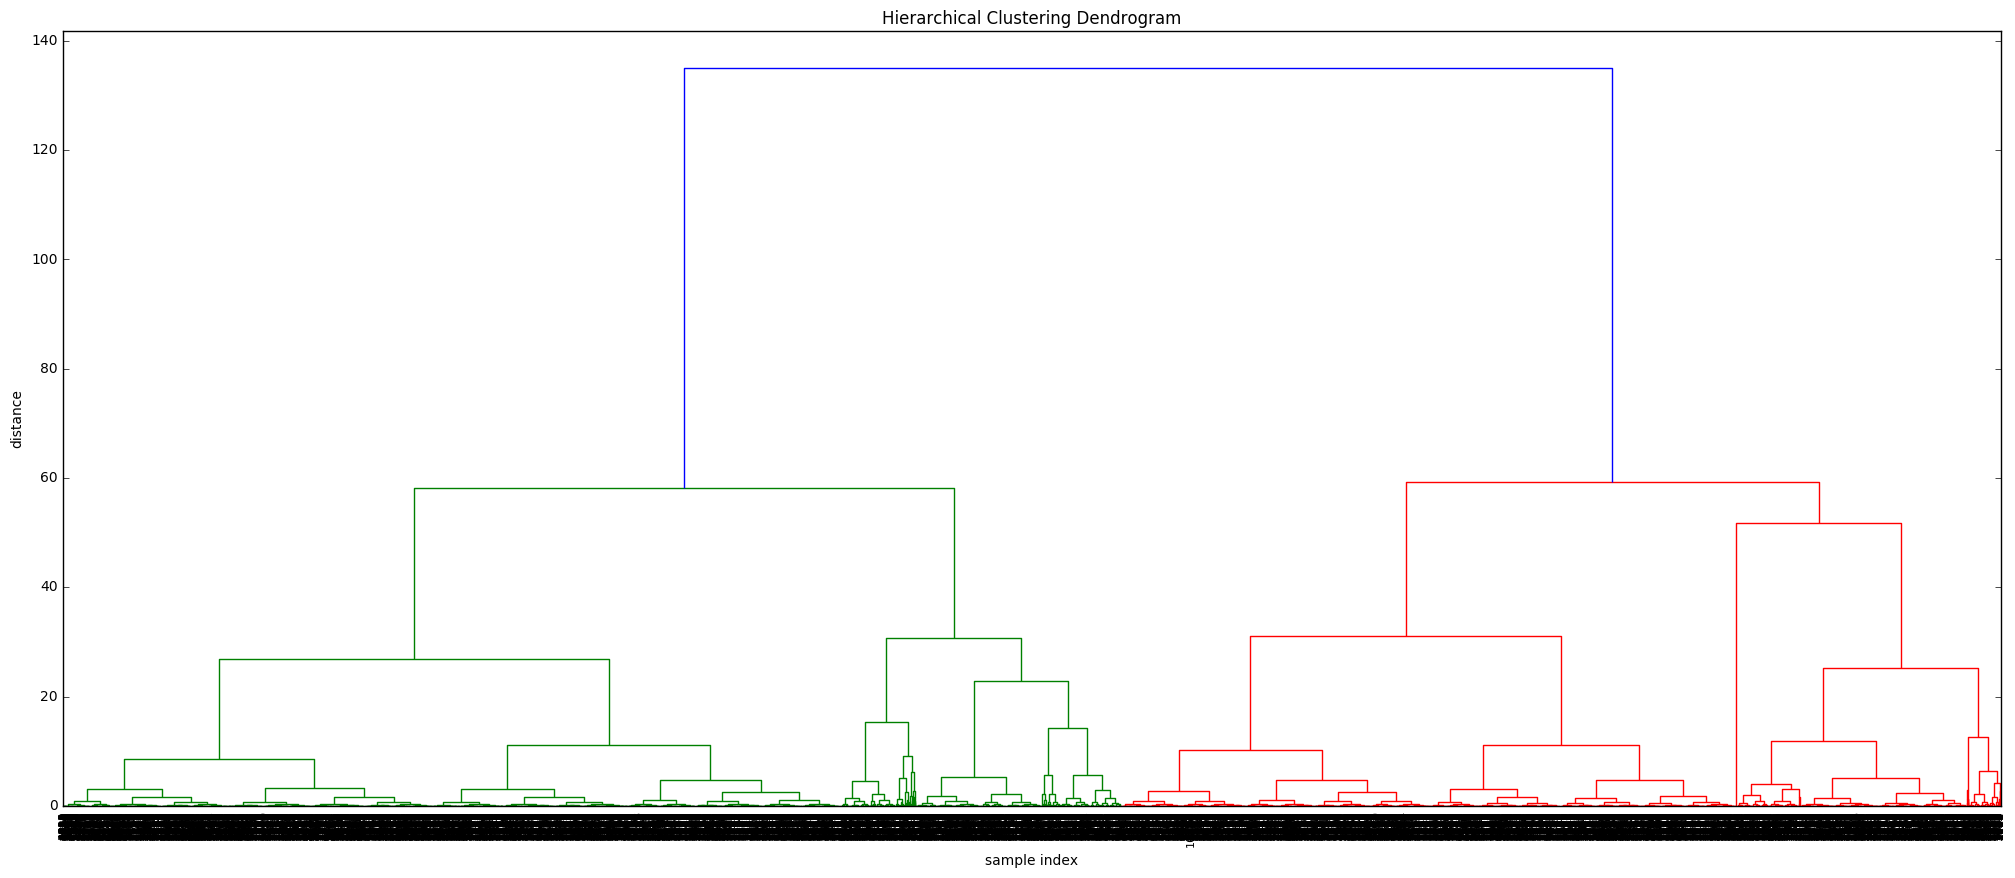

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [7]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [8]:
# set cut-off based on maximum distance from the plotted dendrogram
max_d = 95  # max_d as in max_distance

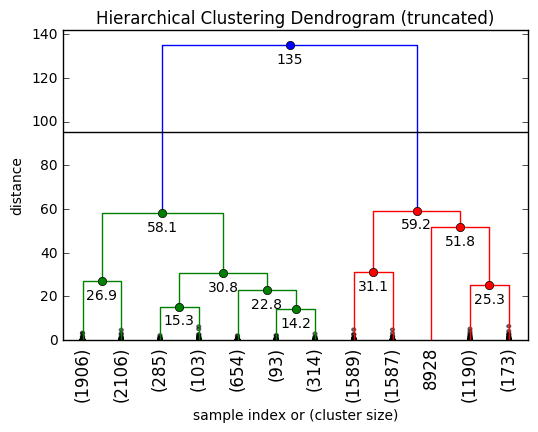

In [9]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

### Viewing the Clusters

In [10]:
from scipy.cluster.hierarchy import fcluster
max_d = 95
clusters = fcluster(Z, max_d, criterion='distance')
clusters
X['Labels'] = clusters
g = X.groupby(['Labels'])
g.groups

{1: [2,
  3,
  5,
  7,
  8,
  9,
  14,
  15,
  17,
  18,
  19,
  21,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  39,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  51,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  62,
  64,
  65,
  67,
  70,
  73,
  74,
  76,
  78,
  79,
  80,
  81,
  84,
  85,
  86,
  88,
  89,
  90,
  91,
  92,
  93,
  95,
  98,
  99,
  101,
  102,
  103,
  104,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  117,
  119,
  122,
  126,
  127,
  128,
  129,
  130,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  145,
  146,
  147,
  148,
  149,
  151,
  152,
  157,
  160,
  162,
  163,
  166,
  167,
  169,
  171,
  172,
  173,
  174,
  175,
  178,
  183,
  187,
  188,
  189,
  192,
  195,
  196,
  198,
  199,
  202,
  203,
  204,
  205,
  206,
  210,
  213,
  214,
  215,
  216,
  217,
  221,
  224,
  226,
  228,
  229,
  230,
  231,
  242,
  243,
  244,
  246,
  247,
  250,
  252,
  253,
  254,
 